In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
brfss_dataset_path = r"C:\Users\idhan\Downloads\pfas_health_issues\data\Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System_20240828.csv"

In [3]:
brfss_dataset = pd.read_csv(brfss_dataset_path)

In [4]:
#Filtering out the overweight classifcation and the obesity data
brfss_obesity_and_overweight_data = brfss_dataset.loc[(brfss_dataset['Question'] == "Percent of adults aged 18 years and older who have obesity") | (brfss_dataset['Question'] == "Percent of adults aged 18 years and older who have an overweight classification")]

print(brfss_obesity_and_overweight_data)

       YearStart  YearEnd LocationAbbr          LocationDesc  \
1           2014     2014           GU                  Guam   
2           2013     2013           US              National   
3           2013     2013           US              National   
6           2012     2012           WY               Wyoming   
7           2012     2012           DC  District of Columbia   
...          ...      ...          ...                   ...   
93243       2022     2022           WY               Wyoming   
93244       2022     2022           WY               Wyoming   
93246       2022     2022           WY               Wyoming   
93247       2022     2022           WY               Wyoming   
93248       2022     2022           WY               Wyoming   

                                       Datasource                    Class  \
1      Behavioral Risk Factor Surveillance System  Obesity / Weight Status   
2      Behavioral Risk Factor Surveillance System  Obesity / Weight Status 

In [5]:
#Checking all the locations in the data and sorting the locations
unique_location = brfss_obesity_and_overweight_data["LocationDesc"].unique()
unique_location = list(unique_location)
unique_location.sort()
unique_location

['Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'District of Columbia',
 'Florida',
 'Georgia',
 'Guam',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'National',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Puerto Rico',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virgin Islands',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming']

In [6]:
#checking all unique location abbreviations and sorting them
#WARNING THIS ORDER IS NOT THE SAME AS LOCATION ORDER DUE TO STUFF LIKE AZ = ARIZONA
unique_location_abbr = brfss_obesity_and_overweight_data["LocationAbbr"].unique()
unique_location_abbr = list(unique_location_abbr)
unique_location_abbr.sort()
unique_location_abbr

['AK',
 'AL',
 'AR',
 'AZ',
 'CA',
 'CO',
 'CT',
 'DC',
 'DE',
 'FL',
 'GA',
 'GU',
 'HI',
 'IA',
 'ID',
 'IL',
 'IN',
 'KS',
 'KY',
 'LA',
 'MA',
 'MD',
 'ME',
 'MI',
 'MN',
 'MO',
 'MS',
 'MT',
 'NC',
 'ND',
 'NE',
 'NH',
 'NJ',
 'NM',
 'NV',
 'NY',
 'OH',
 'OK',
 'OR',
 'PA',
 'PR',
 'RI',
 'SC',
 'SD',
 'TN',
 'TX',
 'US',
 'UT',
 'VA',
 'VI',
 'VT',
 'WA',
 'WI',
 'WV',
 'WY']

In [7]:
#filter out the data by location in lexicographical order
location_dataset = []
for location in unique_location:
    location_dataset.append( brfss_obesity_and_overweight_data[brfss_obesity_and_overweight_data["LocationDesc"]==location])
#location_dataset #to print the dataset

In [8]:
#weighted average using sample size and percentage of people with obesity and overweight classification by state
location_weighted_mean = []
for location_data in location_dataset:
    weighted_location_average = (location_data["Data_Value"] * location_data["Sample_Size"]).sum()
    total_people_location = location_data["Sample_Size"].sum()
    percentage_people_location = weighted_location_average/total_people_location
    location_weighted_mean.append(percentage_people_location)


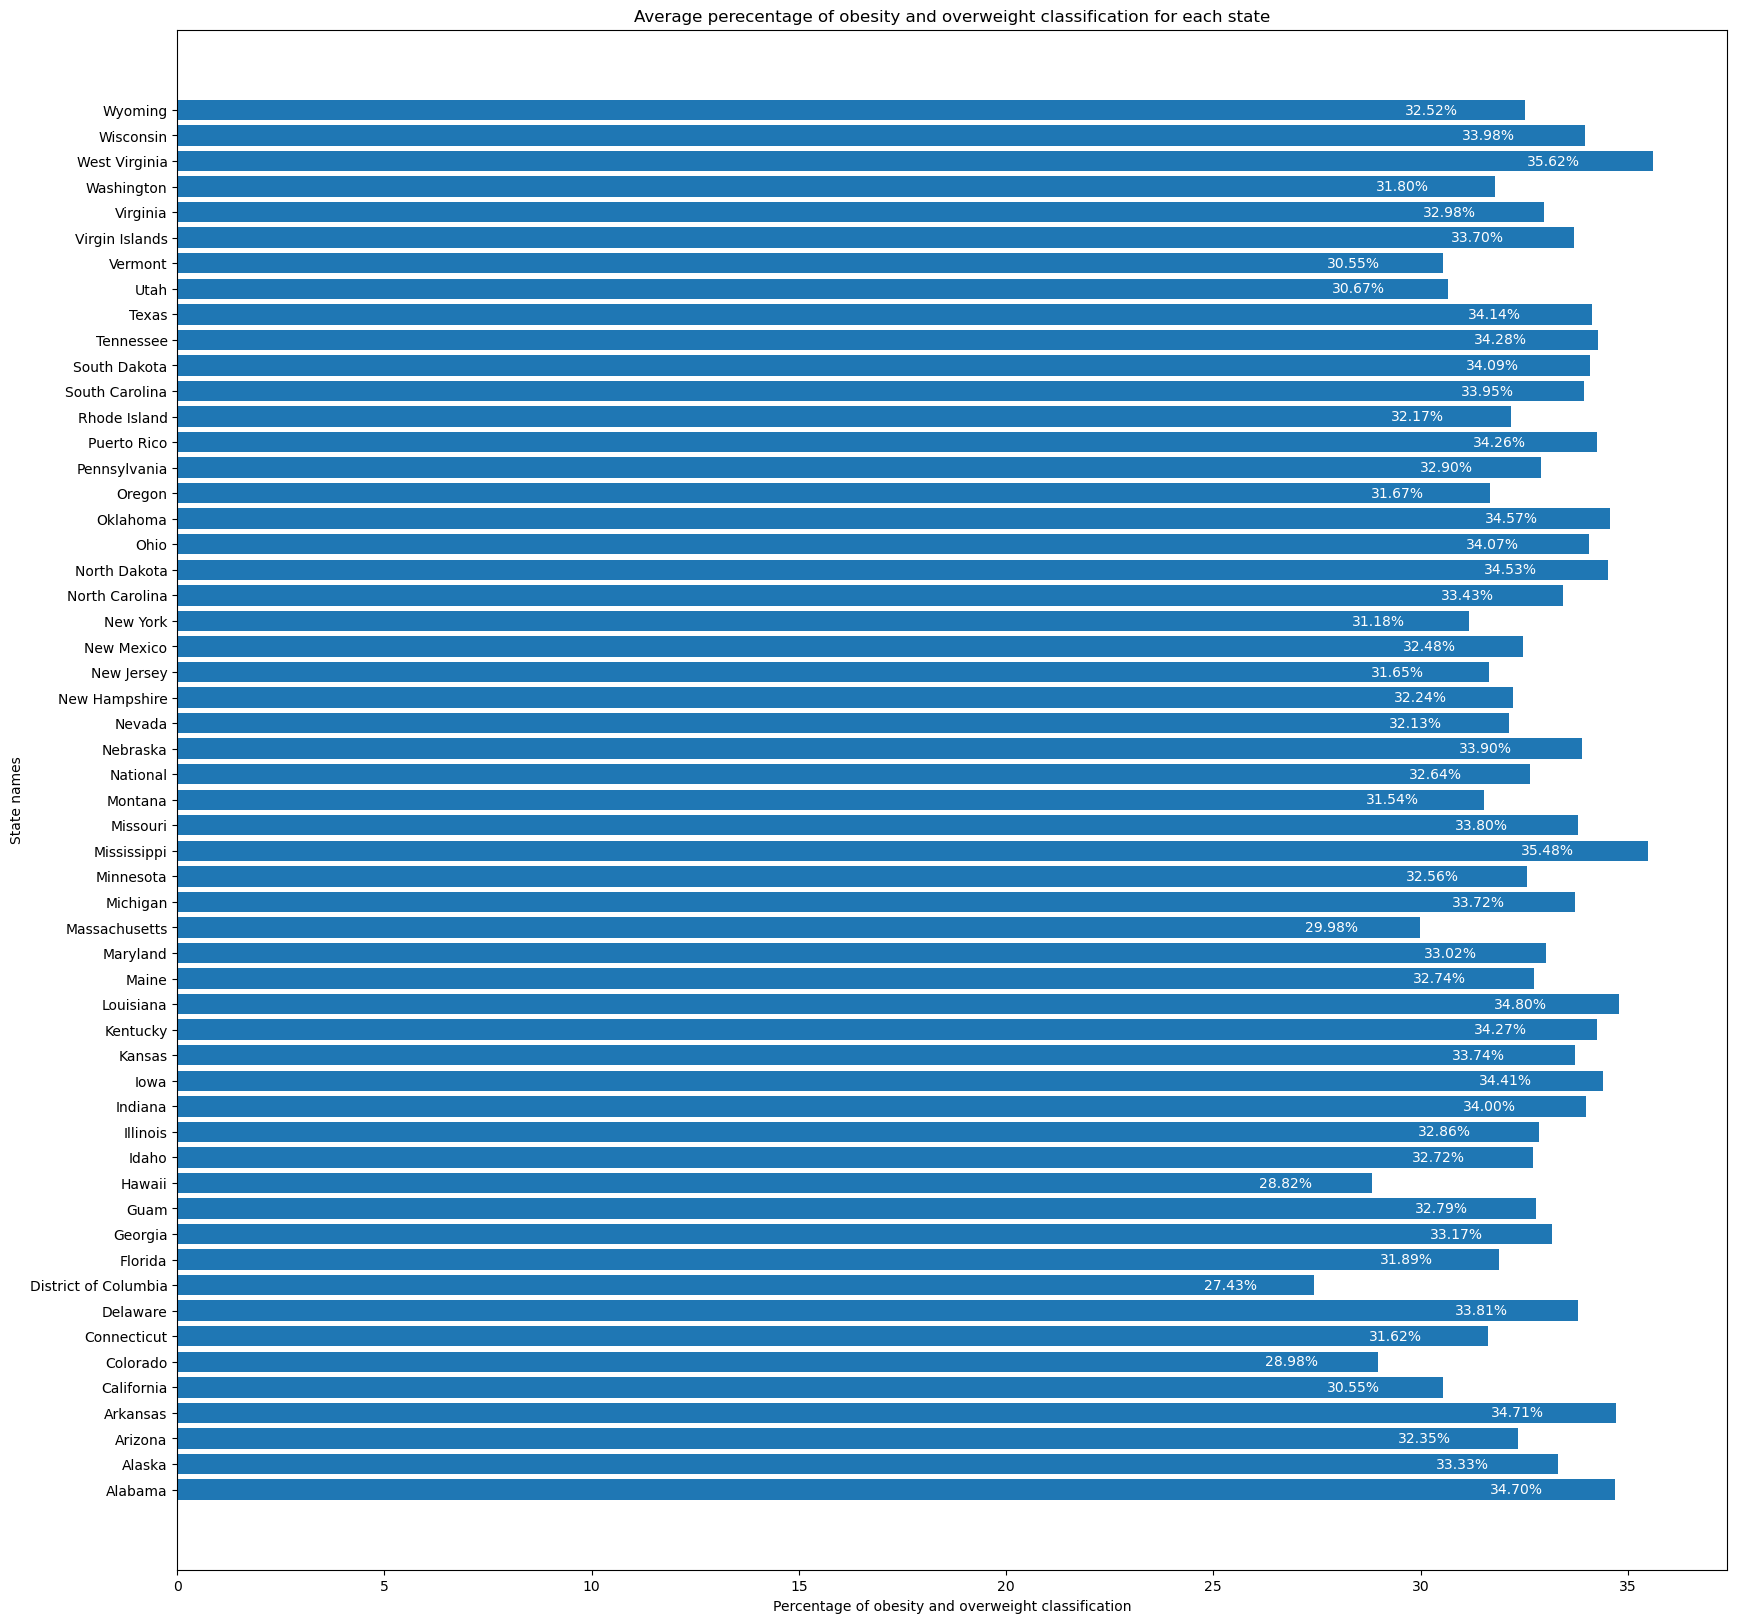

In [9]:
#plotting average percentage of obesity and overweight classification for each state
plt.figure(figsize=(20,20)) 
plt.title("Average perecentage of obesity and overweight classification for each state")
plt.ylabel("State names")
plt.xlabel("Percentage of obesity and overweight classification")
#have exact value of the bar written in text
bars = plt.barh(unique_location,location_weighted_mean)
for bar in bars:
    plt.text(bar.get_width() - (bar.get_width() * 0.05),  
             bar.get_y() + bar.get_height() / 2,  
             f'{bar.get_width():.2f}%',  
             va='center', ha='right', color='white', fontsize=10)  

In [10]:
#Checking all the start years in the data and sorting the year
unique_year = brfss_obesity_and_overweight_data["YearStart"].unique()
unique_year = list(unique_year)
unique_year.sort()
unique_year

[2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

In [12]:
#filter out the data by year in chronological order
year_dataset = []
for year in unique_year:
    year_dataset.append( brfss_obesity_and_overweight_data[brfss_obesity_and_overweight_data["YearStart"]==year])
#year_dataset #to print the dataset

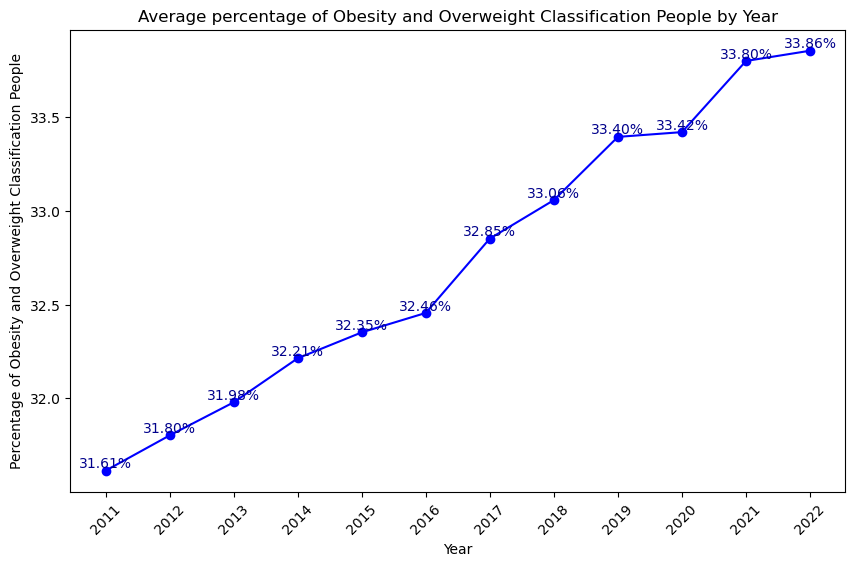

In [24]:
#plot the average percentage of obesity and overweight classification people by year
plt.figure(figsize=(10, 6))  
plt.plot(unique_year, year_weighted_mean, marker='o', linestyle='-', color='b') 
plt.title('Average percentage of Obesity and Overweight Classification People by Year')  
plt.xlabel('Year')
plt.ylabel('Percentage of Obesity and Overweight Classification People') 
plt.xticks(unique_year, labels=[str(year) for year in unique_year], rotation=45)

# have text for each value
for i, value in enumerate(year_weighted_mean):
    plt.text(unique_year[i], value, f'{value:.2f}%', ha='center', va='bottom', color='darkblue')




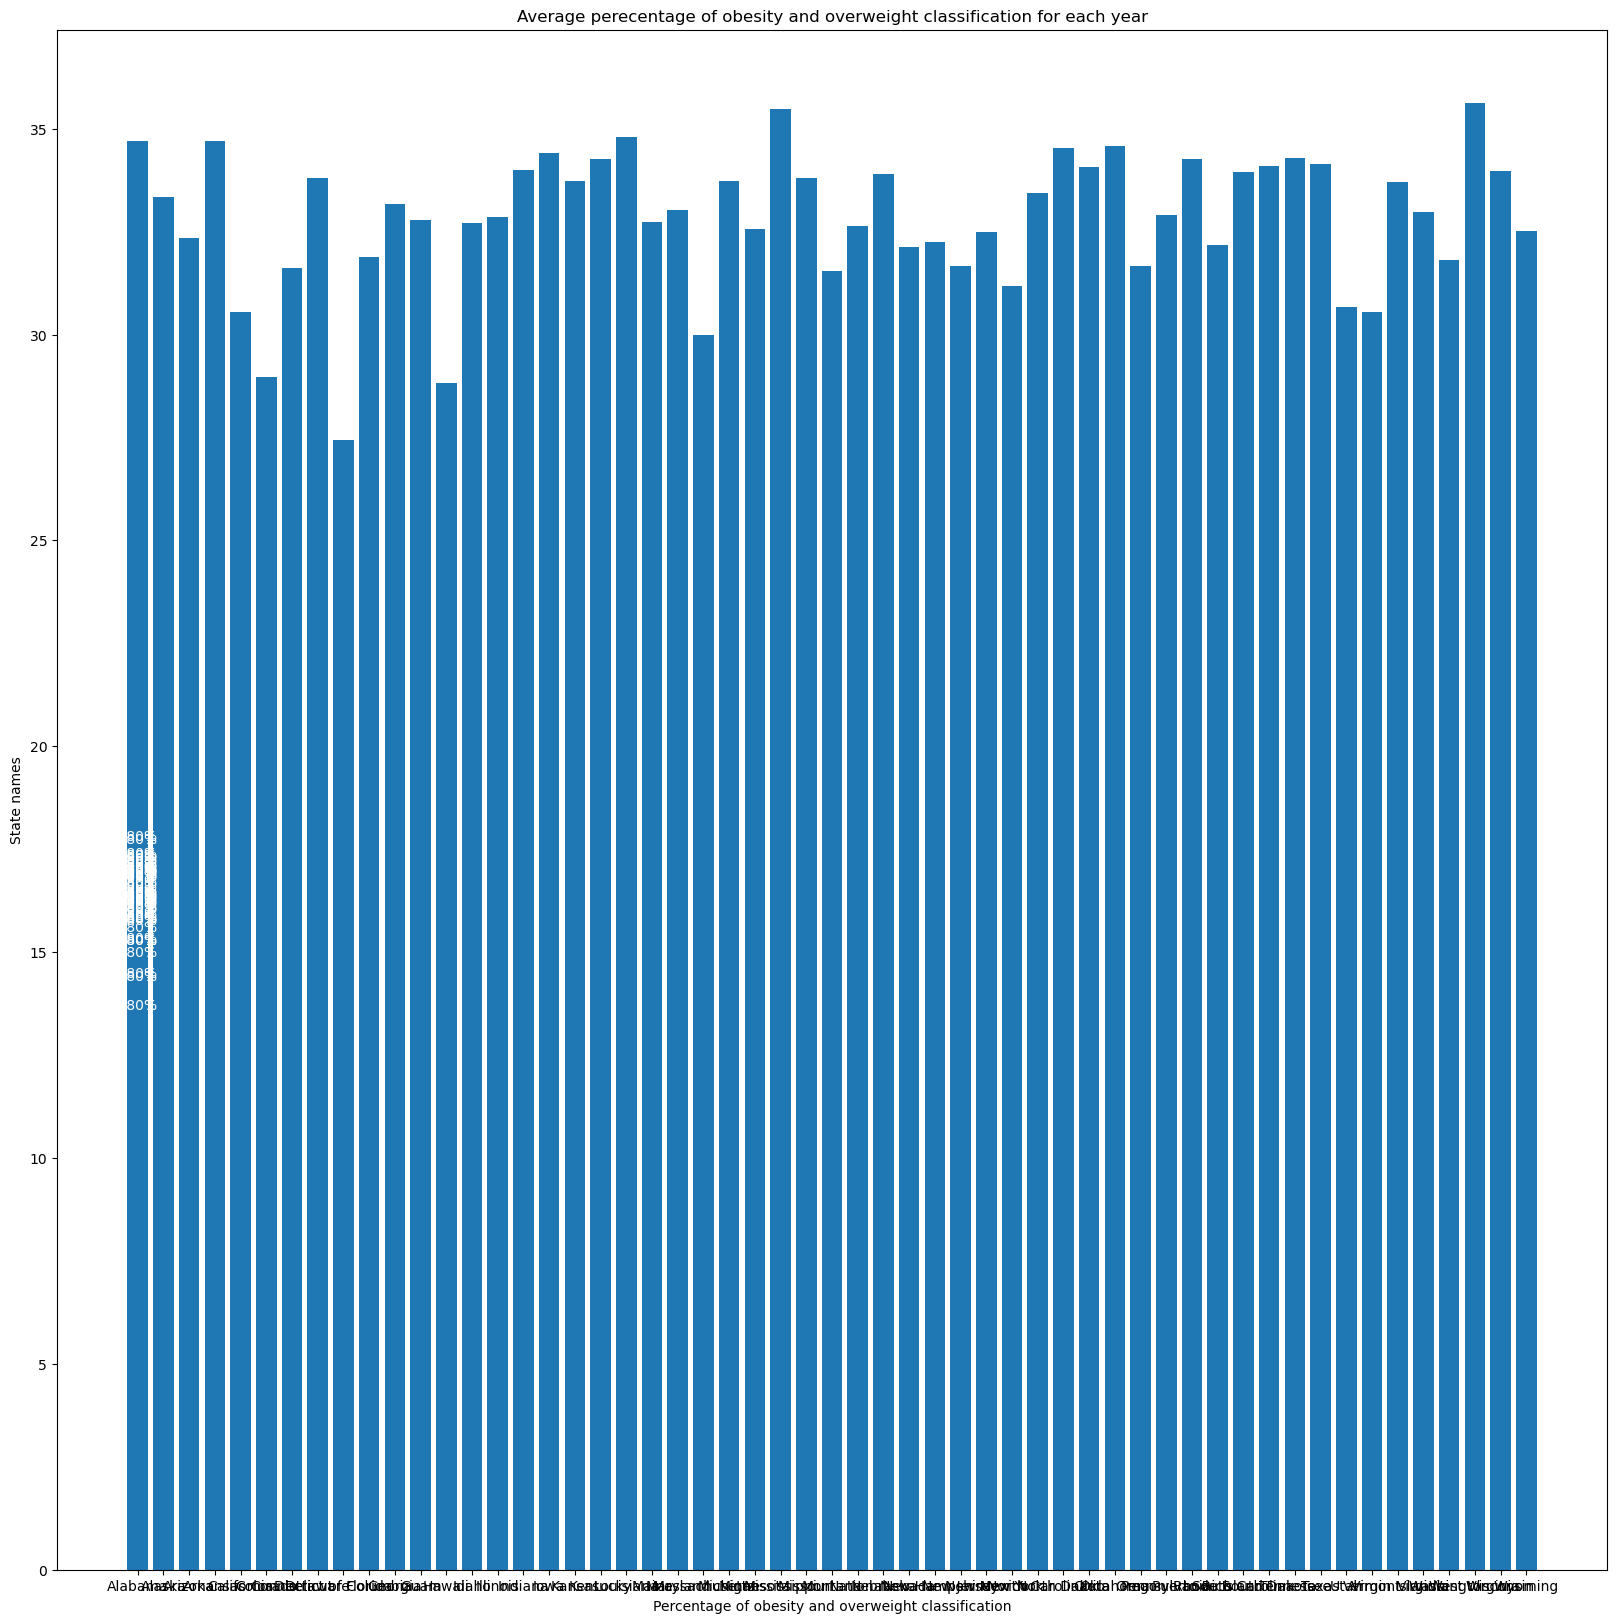